### Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

C:\Users\naikr\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')

In [3]:
## Creating bin ranges and bin names
bin_ranges = [0, 0.40, 0.69, 1]
bin_names = [1, 2, 3]

In [4]:
# Discretization of Target feature into 3 classes 
df['Admit_bin_custom_range'] = pd.cut(np.array(df['Chance of Admit ']), bins=bin_ranges)
df['Admit_bin_custom_label'] = pd.cut(np.array(df['Chance of Admit ']), bins=bin_ranges, labels=bin_names)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit_bin_custom_range,Admit_bin_custom_label
0,1,337,118,4,4.5,4.5,9.65,1,0.92,"(0.69, 1.0]",3
1,2,324,107,4,4.0,4.5,8.87,1,0.76,"(0.69, 1.0]",3
2,3,316,104,3,3.0,3.5,8.00,1,0.72,"(0.69, 1.0]",3
3,4,322,110,3,3.5,2.5,8.67,1,0.80,"(0.69, 1.0]",3
4,5,314,103,2,2.0,3.0,8.21,0,0.65,"(0.4, 0.69]",2


In [6]:
df['Admit_bin_custom_label'].unique()

[3, 2, 1]
Categories (3, int64): [1 < 2 < 3]

In [7]:
df.loc[df['Chance of Admit '] < 0.40].count()

Serial No.                8
GRE Score                 8
TOEFL Score               8
University Rating         8
SOP                       8
LOR                       8
CGPA                      8
Research                  8
Chance of Admit           8
Admit_bin_custom_range    8
Admit_bin_custom_label    8
dtype: int64

In [8]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
df3 = df[cols]
df3.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [9]:
y_class = df['Admit_bin_custom_label']

In [10]:
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(df3, y_class, test_size=0.2, random_state=123)

In [11]:
y_train_cls.shape

(400,)

In [0]:
## Using Decision Tree for Classification
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [13]:
clf.fit(X_train_cls, y_train_cls)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
y_pred_cls = clf.predict(X_test_cls)

In [15]:
print("Accuracy:",accuracy_score(y_test_cls, y_pred_cls))

Accuracy: 0.83


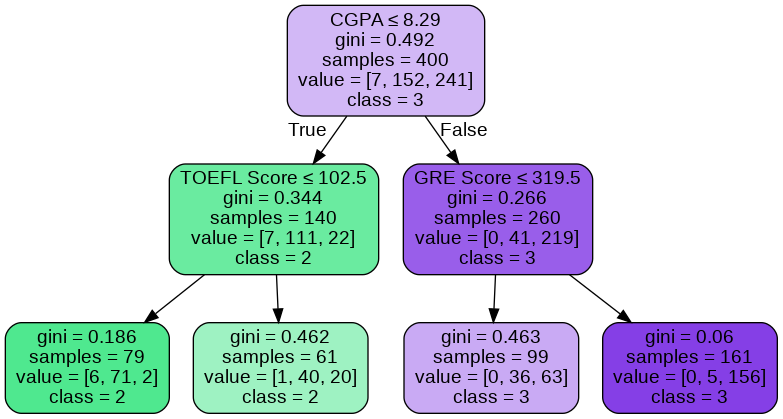

In [16]:
## Visualization for rule generation

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('admit.png')
Image(graph.create_png())

[3 3 2 2 3 2 3 3 3 3 3 3 3 3 2 3 2 3 3 3 2 3 3 2 3 2 2 3 3 3 2 3 2 3 2 3 3
 3 3 2 2 3 3 3 3 2 2 3 3 3 3 2 2 3 2 2 3 2 2 2 3 3 3 2 2 3 3 3 3 3 3 3 2 3
 2 3 3 2 2 2 3 2 3 3 3 3 3 2 3 2 3 3 2 3 2 2 3 3 3 2]
[3 3 2 2 3 2 3 3 2 3 3 3 3 2 2 3 2 3 3 2 2 3 3 3 3 2 2 3 3 3 2 3 2 2 2 3 3
 3 3 2 2 3 2 3 3 3 3 2 3 3 3 2 2 3 2 2 3 2 3 2 3 3 3 2 2 3 3 3 3 3 2 3 2 3
 2 3 3 2 2 2 3 2 3 3 3 2 3 2 2 2 3 3 2 3 3 2 2 3 3 2]
[3 3 2 3 3 2 3 3 2 3 3 3 3 2 2 3 2 3 3 2 2 3 3 3 3 2 2 2 3 3 2 3 3 2 2 3 3
 3 3 2 2 3 2 3 3 3 3 2 3 3 3 2 2 3 2 2 3 2 3 2 3 3 3 2 2 3 3 3 3 3 2 3 3 3
 2 3 3 2 2 2 3 2 3 3 3 3 3 2 2 2 3 3 2 3 3 2 2 3 3 2]


Text(0, 0.5, 'Accuracy')

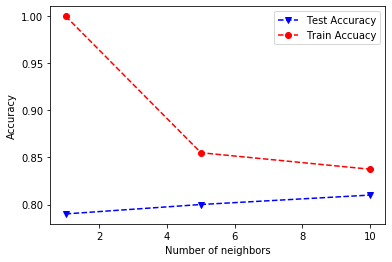

In [21]:
numNeighbors = [1, 5, 10]
testAcc = []
trainAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train_cls, y_train_cls)
    knn_pred = clf.predict(X_test_cls)
    knn_pred_train = clf.predict(X_train_cls)
    print(knn_pred)
    testAcc.append(accuracy_score(y_test_cls, knn_pred))
    trainAcc.append(accuracy_score(y_train_cls,knn_pred_train))

plt.plot(numNeighbors, testAcc,'bv--',numNeighbors, trainAcc, 'ro--')
plt.legend(['Test Accuracy','Train Accuacy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [22]:
svm_model = SVC(gamma='auto')
svm_model.fit(X_train_cls, y_train_cls)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
svm_pred = clf.predict(X_test_cls)

In [26]:
print("Accuracy:",accuracy_score(y_test_cls, svm_pred))

Accuracy: 0.81


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Text(0, 0.5, 'Accuracy')

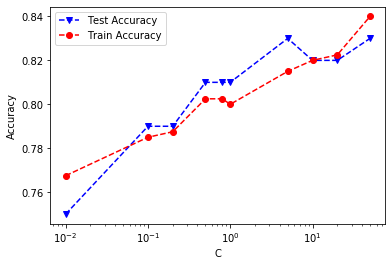

In [27]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []
LRtrainAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_train_cls,y_train_cls)
    log_reg_pred = clf.predict(X_test_cls)
    log_reg_pred_train = clf.predict(X_train_cls)
    LRtestAcc.append(accuracy_score(y_test_cls, log_reg_pred))
    LRtrainAcc.append(accuracy_score(y_train_cls,log_reg_pred_train))
    
    

plt.plot(C, LRtestAcc,'bv--',C,LRtrainAcc,'ro--')
plt.legend(['Test Accuracy','Train Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')  

In [13]:
clf_NB = GaussianNB()
clf_NB.fit(X_train_cls,y_train_cls)
NB_pred = clf_NB.predict(X_test_cls)
print(NB_pred)

[3 3 2 2 3 3 3 3 2 3 3 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 3 2 3 2 2 1 3 3
 3 3 2 2 3 2 3 3 3 2 2 3 3 3 2 2 2 2 2 2 2 2 3 3 3 3 2 2 3 3 3 3 3 2 3 2 3
 2 3 3 2 2 2 3 2 3 3 3 3 3 2 3 2 3 3 2 3 2 2 2 2 3 2]


In [14]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test_cls, NB_pred)))

Accuracy on test data is 0.86
